**Inspired by the [first-place solution](https://www.kaggle.com/competitions/image-matching-challenge-2025/discussion/583058) by [@ns6464](https://www.kaggle.com/ns6464), I've put together a demo showcasing how to run MASt3R within Kaggle.**

In [1]:
import sys

In [2]:
!pip install torch torchvision torchaudio --no-index --find-links=/kaggle/input/mast3r-fix/mast3r-wheels

Looking in links: /kaggle/input/mast3r-fix/mast3r-wheels
Processing /kaggle/input/mast3r-fix/mast3r-wheels/nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl (from torch)
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
Processing /kaggle/input/mast3r-fix/mast3r-wheels/torch-2.7.1-cp311-cp311-manylinux_2_28_x86_64.whl
Processing /kaggle/input/mast3r-fix/mast3r-wheels/sympy-1.14.0-py3-none-any.whl (from torch)
Processing /kaggle/input/mast3r-fix/mast3r-wheels/nvidia_cuda_nvrtc_cu12-12.6.77-py3-none-manylinux2014_x86_64.whl (from torch)
Processing /kaggle/input/mast3r-fix/mast3r-wheels/nvidia_cuda_runtime_cu12-12.6.77-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (from torch)
Processing /kaggle/input/mast3r-fix/mast3r-wheels/nvidia_cuda_cupti_cu12-12.6.80-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (from torch)
Processing /kaggle/input/mast3r-fix/mast3r-wheels/nvid

In [3]:
!pip install faiss-gpu-cu12 --no-index --find-links=/kaggle/input/mast3r-fix/mast3r-wheels

Looking in links: /kaggle/input/mast3r-fix/mast3r-wheels
Processing /kaggle/input/mast3r-fix/mast3r-wheels/faiss_gpu_cu12-1.11.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl


In [4]:
# 离线安装所有依赖（不联网）
!pip install --no-index --find-links=/kaggle/input/mast3r-fix/mast3r-wheels \
    -r /kaggle/input/mast3r-fix/mast3r/requirements.txt \
    -r /kaggle/input/mast3r-fix/mast3r/dust3r/requirements.txt \
    -r /kaggle/input/mast3r-fix/mast3r/dust3r/requirements_optional.txt

Looking in links: /kaggle/input/mast3r-fix/mast3r-wheels
Processing /kaggle/input/mast3r-fix/mast3r-wheels/roma-1.5.3-py3-none-any.whl (from -r /kaggle/input/mast3r-fix/mast3r/dust3r/requirements.txt (line 3))
Processing /kaggle/input/mast3r-fix/mast3r-wheels/gradio-5.33.0-py3-none-any.whl (from -r /kaggle/input/mast3r-fix/mast3r/dust3r/requirements.txt (line 4))
Processing /kaggle/input/mast3r-fix/mast3r-wheels/trimesh-4.6.11-py3-none-any.whl (from -r /kaggle/input/mast3r-fix/mast3r/dust3r/requirements.txt (line 10))
Processing /kaggle/input/mast3r-fix/mast3r-wheels/pyglet-1.5.31-py3-none-any.whl (from -r /kaggle/input/mast3r-fix/mast3r/dust3r/requirements.txt (line 12))
Processing /kaggle/input/mast3r-fix/mast3r-wheels/pillow_heif-0.22.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (from -r /kaggle/input/mast3r-fix/mast3r/dust3r/requirements_optional.txt (line 1))
Processing /kaggle/input/mast3r-fix/mast3r-wheels/pyrender-0.1.45-py3-none-any.whl (from -r /kaggle/input/m

In [5]:
# 加入源码主目录（包含 mast3r, dust3r 等子目录）
sys.path.insert(0, "/kaggle/input/mast3r-fix/mast3r")
sys.path.insert(0, '/kaggle/input/mast3r-fix/mast3r/asmk')
sys.path.insert(0, '/kaggle/input/mast3r-fix/mast3r/dust3r/croco/models/curope')

# Run gradio demo with internet on mode:

> !PYTHONPATH="/kaggle/input/mast3r-fix/mast3r/asmk:$PYTHONPATH" python3 /kaggle/input/mast3r-fix/mast3r/demo.py --weights /kaggle/input/mast3r-fix/mast3r/checkpoints/MASt3R_ViTLarge_BaseDecoder_512_catmlpdpt_metric.pth --share

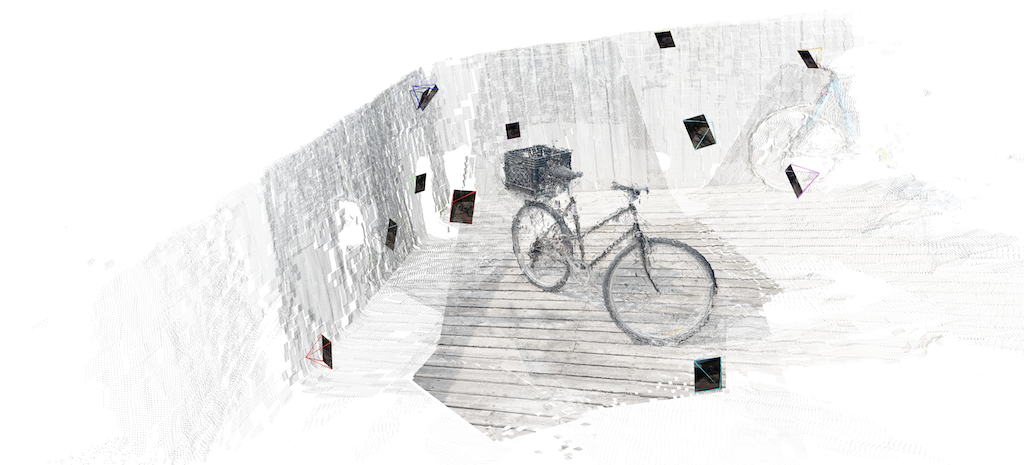

In [6]:
# # %cd /kaggle/working/mast3r
# !PYTHONPATH="/kaggle/input/mast3r-fix/mast3r/asmk:$PYTHONPATH" python3 /kaggle/input/mast3r-fix/mast3r/demo.py --weights /kaggle/input/mast3r-fix/mast3r/checkpoints/MASt3R_ViTLarge_BaseDecoder_512_catmlpdpt_metric.pth --share

In [7]:
from mast3r.model import AsymmetricMASt3R
from mast3r.fast_nn import fast_reciprocal_NNs

import mast3r.utils.path_to_dust3r
from dust3r.inference import inference
from dust3r.utils.image import load_images

In [8]:
# Configuration
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu' # Automatically use GPU if available
print(f"Using device: {device}")

schedule = 'cosine' # These seem to be unused in the provided snippet, but keep for context
lr = 0.01
niter = 300
local_model_directory = "/kaggle/input/mast3r-fix/mast3r/checkpoints/MASt3R_ViTLarge_BaseDecoder_512_catmlpdpt_metric.pth"

# Now, we manually call `load_model` as suggested by `mast3r/model.py`'s `from_pretrained` logic
from mast3r.model import load_model # Assuming load_model is defined in mast3r/model.py or accessible

print(f"Loading model from local path: {local_model_directory}")
model = load_model(local_model_directory, device=device) # Pass device to load_model
print("Model loaded successfully.")

Using device: cuda
Loading model from local path: /kaggle/input/mast3r-fix/mast3r/checkpoints/MASt3R_ViTLarge_BaseDecoder_512_catmlpdpt_metric.pth
... loading model from /kaggle/input/mast3r-fix/mast3r/checkpoints/MASt3R_ViTLarge_BaseDecoder_512_catmlpdpt_metric.pth


/kaggle/input/mast3r-fix/mast3r/mast3r/model.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(model_path, map_location='cpu')


instantiating : AsymmetricMASt3R(enc_depth=24, dec_depth=12, enc_embed_dim=1024, dec_embed_dim=768, enc_num_heads=16, dec_num_heads=12, pos_embed='RoPE100',img_size=(512, 512), head_type='catmlp+dpt', output_mode='pts3d+desc24', depth_mode=('exp', -inf, inf), conf_mode=('exp', 1, inf), patch_embed_cls='PatchEmbedDust3R', two_confs=True, desc_conf_mode=('exp', 0, inf), landscape_only=False)
<All keys matched successfully>
Model loaded successfully.


>> Loading a list of 2 images
 - adding /kaggle/input/image-matching-challenge-2025/train/ETs/another_et_another_et001.png with resolution 360x640 --> 288x512
 - adding /kaggle/input/image-matching-challenge-2025/train/ETs/another_et_another_et007.png with resolution 360x640 --> 288x512
 (Found 2 images)


/kaggle/input/mast3r-fix/mast3r/dust3r/dust3r/inference.py:44: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=bool(use_amp)):
/kaggle/input/mast3r-fix/mast3r/dust3r/dust3r/model.py:205: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/kaggle/input/mast3r-fix/mast3r/dust3r/dust3r/inference.py:48: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


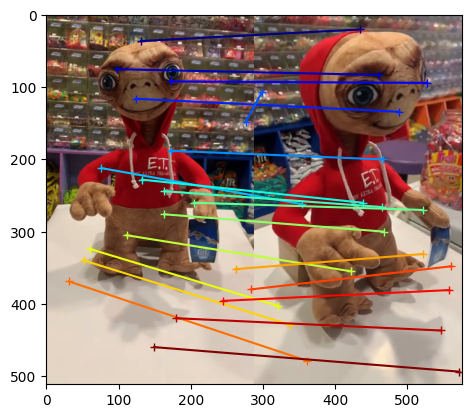

In [9]:
images = load_images(['/kaggle/input/image-matching-challenge-2025/train/ETs/another_et_another_et001.png', 
                      '/kaggle/input/image-matching-challenge-2025/train/ETs/another_et_another_et007.png'], size=512)
output = inference([tuple(images)], model, device, batch_size=1, verbose=False)

# at this stage, you have the raw dust3r predictions
view1, pred1 = output['view1'], output['pred1']
view2, pred2 = output['view2'], output['pred2']

desc1, desc2 = pred1['desc'].squeeze(0).detach(), pred2['desc'].squeeze(0).detach()

# find 2D-2D matches between the two images
matches_im0, matches_im1 = fast_reciprocal_NNs(desc1, desc2, subsample_or_initxy1=8,
                                               device=device, dist='dot', block_size=2**13)

# ignore small border around the edge
H0, W0 = view1['true_shape'][0]
valid_matches_im0 = (matches_im0[:, 0] >= 3) & (matches_im0[:, 0] < int(W0) - 3) & (
    matches_im0[:, 1] >= 3) & (matches_im0[:, 1] < int(H0) - 3)

H1, W1 = view2['true_shape'][0]
valid_matches_im1 = (matches_im1[:, 0] >= 3) & (matches_im1[:, 0] < int(W1) - 3) & (
    matches_im1[:, 1] >= 3) & (matches_im1[:, 1] < int(H1) - 3)

valid_matches = valid_matches_im0 & valid_matches_im1
matches_im0, matches_im1 = matches_im0[valid_matches], matches_im1[valid_matches]

# visualize a few matches
import numpy as np
import torch
import torchvision.transforms.functional
from matplotlib import pyplot as pl

n_viz = 20
num_matches = matches_im0.shape[0]
match_idx_to_viz = np.round(np.linspace(0, num_matches - 1, n_viz)).astype(int)
viz_matches_im0, viz_matches_im1 = matches_im0[match_idx_to_viz], matches_im1[match_idx_to_viz]

image_mean = torch.as_tensor([0.5, 0.5, 0.5], device='cpu').reshape(1, 3, 1, 1)
image_std = torch.as_tensor([0.5, 0.5, 0.5], device='cpu').reshape(1, 3, 1, 1)

viz_imgs = []
for i, view in enumerate([view1, view2]):
    rgb_tensor = view['img'] * image_std + image_mean
    viz_imgs.append(rgb_tensor.squeeze(0).permute(1, 2, 0).cpu().numpy())

H0, W0, H1, W1 = *viz_imgs[0].shape[:2], *viz_imgs[1].shape[:2]
img0 = np.pad(viz_imgs[0], ((0, max(H1 - H0, 0)), (0, 0), (0, 0)), 'constant', constant_values=0)
img1 = np.pad(viz_imgs[1], ((0, max(H0 - H1, 0)), (0, 0), (0, 0)), 'constant', constant_values=0)
img = np.concatenate((img0, img1), axis=1)
pl.figure()
pl.imshow(img)
cmap = pl.get_cmap('jet')
for i in range(n_viz):
    (x0, y0), (x1, y1) = viz_matches_im0[i].T, viz_matches_im1[i].T
    pl.plot([x0, x1 + W0], [y0, y1], '-+', color=cmap(i / (n_viz - 1)), scalex=False, scaley=False)
pl.show(block=True)